In [41]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [42]:
from copy import deepcopy
import random
import math

class TicTacToe:
    """TicTacToe Board."""

    EMPTY = ' '
    P1 = 'X'
    P2 = 'O'

    def __init__(self):
        """Initialize a TicTacToe board."""

        self.initial_state = []
        for i in range(3): #The board is a 3×3 list of lists.
            self.initial_state.append([' ']*3)

        self.players = (self.P1, self.P2)

        self.reset() # called to set the current state.

    @classmethod
    def switch_player(cls, player):
        """Class method that, given a player, returns its opponent"""

        return cls.P2 if player == cls.P1 else cls.P1 #Utility to switch between 'X' and 'O'.


    @classmethod
    def check_termination(cls, state):
        """
        Termination check.

        Returns
        -------
        done: bool
            A boolean indicating the termination

        winning_player: str
            The name of the winning player. The empty cell is returned in case of a draw.
        """

        done = False
        winning_player = ' '

        # Check rows
        for i in range(3):
            first_elem = state[i][0]
            if first_elem != cls.EMPTY:
                done = all(state[i][j]==first_elem for j in range(3))
                if done:
                    return done, first_elem

            # Check columns
            first_elem = state[0][i]
            if first_elem != cls.EMPTY:
                done = all(state[j][i]==first_elem for j in range(3))
                if done:
                    return done, first_elem

        # Check main diagonal 
        first_elem = state[0][0]
        if first_elem != cls.EMPTY:
            done = all(state[i][i]==first_elem for i in range(3))
            if done:
                return done, first_elem

        # Check anti-diagonal
        first_elem = state[0][2]
        if first_elem != cls.EMPTY:
            done = all(state[i][2-i]==first_elem for i in range(3))
            if done:
                return done, first_elem

        # Check draw (no empty cells)
        done = all(state[i][j] != cls.EMPTY for i in range(3) for j in range(3))

        return done, winning_player

    @classmethod
    def get_available_moves(cls, state):
        """Class method that, given a state, returns the free cells"""

        return [(i,j) for i in range(3) for j in range(3) if state[i][j] == ' ']

    @property
    def available_moves(self):
        """Available moves at current state"""

        return self.get_available_moves(self.current_state)

    @classmethod
    def transition_function(cls, state, action, player):
        """Transition function"""

        # asserts the chosen cell is empty.
        assert state[action[0]][action[1]] == cls.EMPTY

        #Places the player’s symbol
        state[action[0]][action[1]] = player
        #Switches the player to move.
        player = cls.switch_player(player)
        return state, player

    def step(self, action):
        """Step function"""

        # Check that the game is not already over
        self.done, winning_player = self.check_termination(self.current_state)
        assert self.done == False

        # Apply the action
        self.current_state, self.current_player = self.transition_function(self.current_state, action, self.current_player)

        # Re-check termination and compute reward 
        reward = 0
        self.done, winning_player = self.check_termination(self.current_state)
        # self.player is the one we care about when computing the reward
        if winning_player == self.player:
            reward = 1
        if winning_player == self.switch_player(self.player):
            reward = -1

        return self.current_state, reward, self.done, self.current_player

    def render(self, state=None):
        """Render function"""

        if state is None:
            state = self.current_state

        for i in range(3):
            print('-----------')
            print("|".join((f" {x} " for x in state[i])))
        print('-----------')
        print('###########')

    def reset(self, player=None):
        """
        Resets the environment.

        Player 'X' always moves first. If 'O' is selected, the first move is made
        """


        self.done = False
        self.player = player
        if self.player is None:
            self.player = self.P1

        self.current_state = deepcopy(self.initial_state)
        self.current_player = self.P1

        if player == self.P2:
            self.step(random.choice(self.available_moves))

        return self.current_state, self.current_player

![alt text](MCTS.png "Title")

In [ ]:
class MCTSNode:
    """MCTS Node."""

    def __init__(self, state, player, parent=None, action=None):
        """Initialize a node."""
        # ...

    @property
    def fully_expanded(self):
        # ...

    def expand(self):
        """Pick an untried action, evaluate it, generate the node for the resulting state (also add it to the children) and return it."""
        # ...
        

    def rollout(self):
        """Until termination, move randomly. Return the result (winning player)"""
        # ...

    def backpropagate(self, result):
        """Backprop the result of a rollout up to the root node: For each node in the path update the visits and the number of wins"""
        # ...

    def traverse(self, c=2.0):
        """Traverse the nodes until an unexpanded one is found or termination is reached"""
        # ...

    def win_ratio(self): 
        """Win Ratio of a node"""
        # ...

    def uct(self, c=2.0):
        """UCT value of a node"""
        # ...

    def best_child(self): 
        """Return the best child (the one with the highest win ratio)"""
        # ...
        
    def best_uct_child(self, c=2.0): 
        """Return the best child according to UCT"""
        # ...

In [44]:
def mcts(state, player, c=2.0, iters=5000):
    root = MCTSNode(deepcopy(state), player)
    for i in range(iters): # Repeat for iters iterations.
        leaf = root.traverse(c) # selection + expansion
        simulation_result = leaf.rollout() # simulation
        leaf.backpropagate(simulation_result) # backpropagation
    
    #root.best_child().action is the action with the highest win ratio.
    # the function also returns the root node itself (useful if you want to inspect the tree).
    return root.best_child().action, root

In [45]:
player = 'X'

In [46]:
env = TicTacToe()

# Random Agents (X and O)

In [47]:
rewards = []
for i in range(10):
    state, cur_player = env.reset(player)
    done = False
    total_reward = 0
    while not done:
        action = random.choice(env.available_moves)
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

print('Mean Reward over 10 episodes:', sum(rewards)/len(rewards))

Mean Reward over 10 episodes: -0.3


# MCTS Agent (X) and Random Agend (O)

In [48]:
state, cur_player = env.reset(player)
done = False

env.render()

while not done:
    if cur_player == player:
        action, root = mcts(deepcopy(state), player)
    else:
        action = random.choice(env.available_moves)
    state, reward, done, cur_player = env.step(action)
    env.render()

-----------
   |   |   
-----------
   |   |   
-----------
   |   |   
-----------
###########
-----------
   |   |   
-----------
   | X |   
-----------
   |   |   
-----------
###########
-----------
   |   |   
-----------
   | X | O 
-----------
   |   |   
-----------
###########
-----------
   |   |   
-----------
   | X | O 
-----------
   |   | X 
-----------
###########
-----------
   |   | O 
-----------
   | X | O 
-----------
   |   | X 
-----------
###########
-----------
 X |   | O 
-----------
   | X | O 
-----------
   |   | X 
-----------
###########


In [49]:
rewards = []
for i in range(10):
    state, cur_player = env.reset(player)
    done = False

    total_reward = 0
    while not done:
        if cur_player == player:
            action, root = mcts(deepcopy(state), player)
        else:
            action = random.choice(env.available_moves)
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

print('Mean Reward over 10 episodes:', sum(rewards)/len(rewards))

Mean Reward over 10 episodes: 1.0


# MCTS Agents (X and O)

In [50]:
state, cur_player = env.reset(player)
done = False

env.render()

while not done:
    action, root = mcts(deepcopy(state), cur_player)
    state, reward, done, cur_player = env.step(action)
    env.render()

-----------
   |   |   
-----------
   |   |   
-----------
   |   |   
-----------
###########
-----------
   |   |   
-----------
   | X |   
-----------
   |   |   
-----------
###########
-----------
   |   |   
-----------
   | X |   
-----------
   |   | O 
-----------
###########
-----------
   |   |   
-----------
   | X | X 
-----------
   |   | O 
-----------
###########
-----------
   |   |   
-----------
 O | X | X 
-----------
   |   | O 
-----------
###########
-----------
   |   |   
-----------
 O | X | X 
-----------
   | X | O 
-----------
###########
-----------
   | O |   
-----------
 O | X | X 
-----------
   | X | O 
-----------
###########
-----------
   | O |   
-----------
 O | X | X 
-----------
 X | X | O 
-----------
###########
-----------
   | O | O 
-----------
 O | X | X 
-----------
 X | X | O 
-----------
###########
-----------
 X | O | O 
-----------
 O | X | X 
-----------
 X | X | O 
-----------
###########


In [51]:
rewards = []
for i in range(10):
    state, cur_player = env.reset(player)
    done = False

    total_reward = 0
    while not done:
        action, root = mcts(deepcopy(state), cur_player)
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

print('Mean Reward over 10 episodes:', sum(rewards)/len(rewards))

Mean Reward over 10 episodes: 0.0


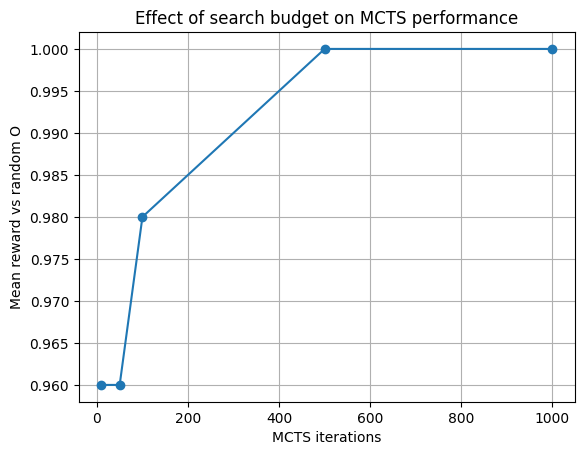

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iters_list = [1, 2, 5, 10, 15, 20, 50, 100, 200, 500, 1000]
n_episodes = 50

mean_rewards = []

for iters in iters_list:
    rewards = []
    for _ in range(n_episodes):
        state, cur_player = env.reset(player='X')
        done = False
        total_reward = 0
        while not done:
            if cur_player == 'X':
                action, _ = mcts(state, player='X', iters=iters)
            else:
                action = random.choice(env.available_moves)
            state, reward, done, cur_player = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    mean_rewards.append(np.mean(rewards))

# plt.plot(iters_list, mean_rewards, marker='o')
# plt.xlabel("MCTS iterations")
# plt.ylabel("Mean reward vs random O")
# plt.title("Effect of search budget on MCTS performance")
# plt.grid(True)
# plt.show()
plt.semilogx(iters_list, mean_rewards, marker='o')
plt.xticks(iters_list, iters_list)  # show your exact iteration values
plt.xlabel("MCTS iterations (log scale)")
plt.ylabel("Mean reward vs random O")
plt.title("Effect of search budget on MCTS performance")
plt.grid(True, which="both")
plt.show()


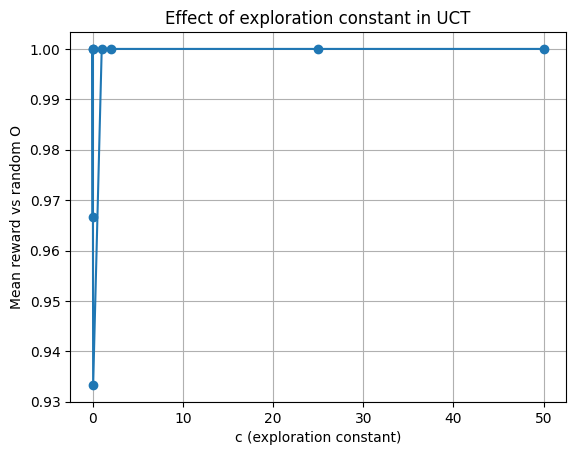

In [ ]:
cs = [0.00001, 0.0005, 0.001, 0.05, 1.0, 2.0, 25.0, 50.0]
mean_rewards = []

for c in cs:
    rewards = []
    for _ in range(30):
        state, cur_player = env.reset(player='X')
        done = False
        total_reward = 0
        while not done:
            if cur_player == 'X':
                action, _ = mcts(state, player='X', iters=1, c=c)
            else:
                action = random.choice(env.available_moves)
                # action, _ = mcts(state, player='O', iters=500, c=2)
            state, reward, done, cur_player = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    mean_rewards.append(np.mean(rewards))

plt.plot(cs, mean_rewards, marker='o')
plt.xlabel("c (exploration constant)")
plt.ylabel("Mean reward vs random O")
plt.title("Effect of exploration constant in UCT")
plt.grid(True)
plt.show()
